In [10]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from os import listdir
from os.path import isfile, join

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

matplotlib.rcParams['figure.figsize'] = [12, 8]

In [11]:
from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'load_extensions': {'calysto/spell-check/main': True},
 'CodeCell': {'cm_config': {'autoCloseBrackets': False}}}

In [27]:
#import comsol data

#import box data

location = 'data/comsolData/biconAnd30cmDipole_box_60_60_57_0.5MHzRes_1.1.22/powerBicon_dBm.txt'

df_comsol_biconAnd30cmDipole_box_60_60_57 = pd.DataFrame()

df_comsol_biconAnd30cmDipole_box_60_60_57['Frequency'], \
    df_comsol_biconAnd30cmDipole_box_60_60_57['Power']= np.loadtxt(location, skiprows = 5, unpack = True)


#import move data
location = 'data/comsolData/'
df_comsol = pd.DataFrame()

df_comsol['Frequency'] = np.loadtxt(location + 'powerbicon_dBm_move24pts_160freqPts_1.8.21.txt', skiprows = 5, usecols = 3)
df_comsol['posX'] = np.loadtxt(location + 'powerbicon_dBm_move24pts_160freqPts_1.8.21.txt', skiprows = 5, usecols = 0)
df_comsol['posY'] = np.loadtxt(location + 'powerbicon_dBm_move24pts_160freqPts_1.8.21.txt', skiprows = 5, usecols = 1)
df_comsol['posZ'] = np.loadtxt(location + 'powerbicon_dBm_move24pts_160freqPts_1.8.21.txt', skiprows = 5, usecols = 2)
df_comsol['Power'] = np.loadtxt(location + 'powerbicon_dBm_move24pts_160freqPts_1.8.21.txt', skiprows = 5, usecols = 4)


#import new comsol data set, 1.27.22. Move biocon to 18 points, 661 freq points
location = 'data/comsolData/powerbicon_dBm_move18pts_630freqPts_1.28.22.txt'
df_comsol2 = pd.DataFrame()

df_comsol2['Frequency'] = np.loadtxt(location, skiprows = 5, usecols = 3)
df_comsol2['posX'] = np.loadtxt(location , skiprows = 5, usecols = 0)
df_comsol2['posY'] = np.loadtxt(location, skiprows = 5, usecols = 1)
df_comsol2['posZ'] = np.loadtxt(location, skiprows = 5, usecols = 2)
df_comsol2['Power'] = np.loadtxt(location, skiprows = 5, usecols = 4)

df_comsol2.head



<bound method NDFrame.head of        Frequency   posX   posY   posZ       Power
0      25.000000 -0.698  0.014 -1.204 -129.695825
1      26.000000 -0.698  0.014 -1.204 -132.576168
2      27.000000 -0.698  0.014 -1.204 -120.933474
3      28.000000 -0.698  0.014 -1.204 -115.527026
4      29.000000 -0.698  0.014 -1.204 -111.784789
...          ...    ...    ...    ...         ...
9995  298.662207  0.701  0.174  0.015  -19.264883
9996  298.996656  0.701  0.174  0.015  -15.017030
9997  299.331104  0.701  0.174  0.015  -17.924561
9998  299.665552  0.701  0.174  0.015  -20.168187
9999  300.000000  0.701  0.174  0.015  -17.972242

[10000 rows x 5 columns]>

In [13]:
#import real data

df_real = pd.DataFrame()

fileList = [f for f in listdir('data/realData/') if isfile(join('data/realData/', f))]

for file in fileList:
    print(file)
    print(pd.read_pickle('data/realData/' + file).head())
    df_real = df_real.append(pd.read_pickle('data/realData/' + file))

df_real = df_real.rename(columns={'Raw Power (dBm)': 'Power', 'Frequency (MHz)' : 'Frequency'})
df_real

2022-01-08_15-17_n0.698x_0.014y_0.015z.pkl
   Frequency (MHz)      x      y      z  Raw Power (dBm)
0         5.000000 -0.698  0.014  0.015       -76.691689
1         5.029503 -0.698  0.014  0.015       -76.689926
2         5.059006 -0.698  0.014  0.015       -76.633919
3         5.088509 -0.698  0.014  0.015       -76.848679
4         5.118012 -0.698  0.014  0.015       -76.938042
2022-01-08_14-29_0.701x_n0.312y_0.015z.pkl
   Frequency (MHz)      x      y      z  Raw Power (dBm)
0         5.000000  0.701 -0.312  0.015       -88.702652
1         5.029503  0.701 -0.312  0.015       -88.248039
2         5.059006  0.701 -0.312  0.015       -88.138229
3         5.088509  0.701 -0.312  0.015       -88.333572
4         5.118012  0.701 -0.312  0.015       -88.524429
2022-01-08_15-06_n0.698x_0.014y_n1.204z.pkl
   Frequency (MHz)      x      y      z  Raw Power (dBm)
0         5.000000 -0.698  0.014 -1.204       -96.893585
1         5.029503 -0.698  0.014 -1.204       -96.754150
2         5.059

,Frequency,x,y,z,Power
0,5.000000,-0.698,0.014,0.015,-76.691689
1,5.029503,-0.698,0.014,0.015,-76.689926
2,5.059006,-0.698,0.014,0.015,-76.633919
3,5.088509,-0.698,0.014,0.015,-76.848679
4,5.118012,-0.698,0.014,0.015,-76.938042
...,...,...,...,...,...
9995,299.881988,0.701,0.174,-1.204,-37.632595
9996,299.911491,0.701,0.174,-1.204,-38.097260
9997,299.940994,0.701,0.174,-1.204,-38.572609
9998,299.970497,0.701,0.174,-1.204,-39.046116


In [4]:
df_real.value_counts('y')
#I think I got off on my heights :(

y     
 0.174    70000
 0.014    60000
-0.312    50000
dtype: int64

In [14]:
df_comsol.groupby('Frequency').Power.mean()
df_real.groupby('Frequency').Power.mean()

Frequency
5.000000     -89.318175
5.029503     -89.437403
5.059006     -89.471972
5.088509     -89.516042
5.118012     -89.580539
                ...    
299.881988   -36.909313
299.911491   -36.773534
299.940994   -36.660587
299.970497   -36.563144
300.000000   -36.474699
Name: Power, Length: 10000, dtype: float64

In [15]:
df_comsol.groupby(['Frequency', 'posY']).Power.mean()
df_comsol.groupby(['Frequency', 'posY']).Power.mean()

Frequency   posY   
60.000000   -0.3122   -63.416006
             0.0140   -62.947244
             0.6790   -67.821861
62.222222   -0.3122   -60.718492
             0.0140   -60.218455
                         ...    
249.494949   0.0140   -36.533380
             0.6790   -35.047344
250.000000  -0.3122   -35.066625
             0.0140   -25.406319
             0.6790   -28.660265
Name: Power, Length: 480, dtype: float64

In [16]:
#old comsol
freqArr = np.asarray(df_comsol.groupby('Frequency').mean().iloc[:,3].index)
powerArrMean = np.asarray(df_comsol.groupby('Frequency').mean().iloc[:,3])
powerArrMedian = np.asarray(df_comsol.groupby('Frequency').median().iloc[:,3])

In [34]:
#hew comsol
freqArr2 = np.asarray(df_comsol2.groupby('Frequency').mean().iloc[:,3].index)
powerArrMean2 = np.asarray(df_comsol2.groupby('Frequency').mean().iloc[:,3])
powerArrMedian2 = np.asarray(df_comsol2.groupby('Frequency').median().iloc[:,3])

Text(0, 0.5, 'Power (dBm)')

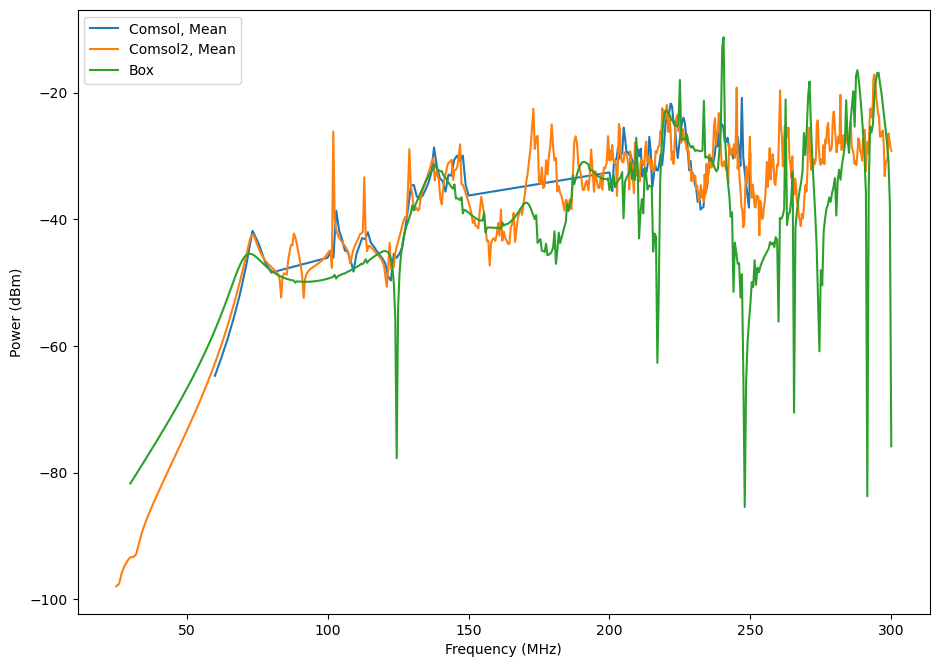

In [43]:
%matplotlib inline

plt.figure(figsize=(11, 8), dpi=100)
plt.plot(freqArr, powerArrMean, label = "Comsol, Mean")
plt.plot(freqArr2, powerArrMean2, label = "Comsol2, Mean")
#plt.plot(freqArr, powerArrMedian, label = "Move Bicon, Median")
plt.plot(df_comsol_biconAnd30cmDipole_box_60_60_57['Frequency'], df_comsol_biconAnd30cmDipole_box_60_60_57['Power']- 8.57, label = 'Box')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel("Power (dBm)")

In [44]:
%matplotlib qt

plt.figure(figsize=(11, 8), dpi=100)
plt.title('Move Bicon, Comsol vs Real Data')
plt.plot( df_real.groupby('Frequency').Power.mean() + 2, label = 'Real+2dB')
#plt.plot( df_real.groupby('Frequency').Power.median(), label = 'Real median')

#plt.plot(freqArr[0:10], powerArrMean[0:10] - 2.8, '#ff7f0e', label = "Comsol-2.8dB, Mean")
#plt.plot(freqArr[11:60], powerArrMean[11:60] - 2.8, '#ff7f0e')
#plt.plot(freqArr[61:160], powerArrMean[61:160] - 2.8, '#ff7f0e')

plt.plot(freqArr2, powerArrMean2 -2.8, 'r')
#plt.plot(freqArr, powerArrMedian, label = "Move Bicon, Median")

plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel("Power (dBm)")

'''
x = [60, 80]
y = [-20, -20]
plt.fill_between(x, y, -90,
                 color = 'blue',
                 alpha = .2)

x = [100, 150]
y = [-20, -20]
plt.fill_between(x, y, -90,
                 color = 'blue',
                 alpha = .2)

x = [200, 250]
y = [-20, -20]
plt.fill_between(x, y, -90,
                 color = 'blue',
                 alpha = .2)
'''

"\nx = [60, 80]\ny = [-20, -20]\nplt.fill_between(x, y, -90,\n                 color = 'blue',\n                 alpha = .2)\n\nx = [100, 150]\ny = [-20, -20]\nplt.fill_between(x, y, -90,\n                 color = 'blue',\n                 alpha = .2)\n\nx = [200, 250]\ny = [-20, -20]\nplt.fill_between(x, y, -90,\n                 color = 'blue',\n                 alpha = .2)\n"

In [11]:
%matplotlib qt 
plt.plot(freqArr, df_comsol.groupby(['Frequency', 'posX']).Power.mean(), label = "Move Bicon X")
plt.plot(df_comsol_biconAnd30cmDipole_box_60_60_57['Frequency (MHz)'], df_comsol_biconAnd30cmDipole_box_60_60_57['Power (dBm)']- 8.57, label = 'Box')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel("Power (dBm)")
    

ValueError: x and y must have same first dimension, but have shapes (160,) and (480,)

In [ ]:
%matplotlib qt

plt.plot(df_comsol2['Frequency


plt.plot(freqArr2, powerArrMean2 -2.8, 'r')
#plt.plot(freqArr, powerArrMedian, label = "Move Bicon, Median")

plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel("Power (dBm)")
